In [1]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('reviews.csv',parse_dates = ['Timestamp']) 
# (need to tell pandas to interpret 'timestamp' column as timestamp, otherwise it will be read as a string
data.head(10)

,Course Name,Timestamp,Rating,Comment
0,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 06:25:52+00:00,4.0,NaN
1,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 05:12:34+00:00,4.0,NaN
2,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 05:11:03+00:00,4.0,NaN
3,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 03:33:24+00:00,5.0,NaN
4,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 03:31:49+00:00,4.5,NaN
5,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 01:10:06+00:00,4.5,NaN
6,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 00:44:54+00:00,4.5,NaN
7,The Python Mega Course: Build 10 Real World Ap...,2021-04-01 23:42:02+00:00,5.0,NaN
8,The Python Mega Course: Build 10 Real World Ap...,2021-04-01 21:58:40+00:00,5.0,NaN
9,The Python Mega Course: Build 10 Real World Ap...,2021-04-01 20:13:27+00:00,5.0,NaN


## Rebuild with monthly data

           Rating
Month            
2018-01  4.429645
2018-02  4.436248
2018-03  4.421671
2018-04  4.468211
2018-05  4.396420
2018-06  4.375379
2018-07  4.393184
2018-08  4.344753
2018-09  4.347247
2018-10  4.374429
2018-11  4.386817
2018-12  4.342105
2019-01  4.401920
2019-02  4.346964
2019-03  4.333145
2019-04  4.420049
2019-05  4.405569
2019-06  4.398559
2019-07  4.382353
2019-08  4.417059
2019-09  4.451135
2019-10  4.483871
2019-11  4.493260
2019-12  4.471046
2020-01  4.439615
2020-02  4.428642
2020-03  4.480690
2020-04  4.475220
2020-05  4.448082
2020-06  4.482812
2020-07  4.517508
2020-08  4.470987
2020-09  4.485862
2020-10  4.515201
2020-11  4.479306
2020-12  4.528358
2021-01  4.551325
2021-02  4.567901
2021-03  4.589207
2021-04  4.544118


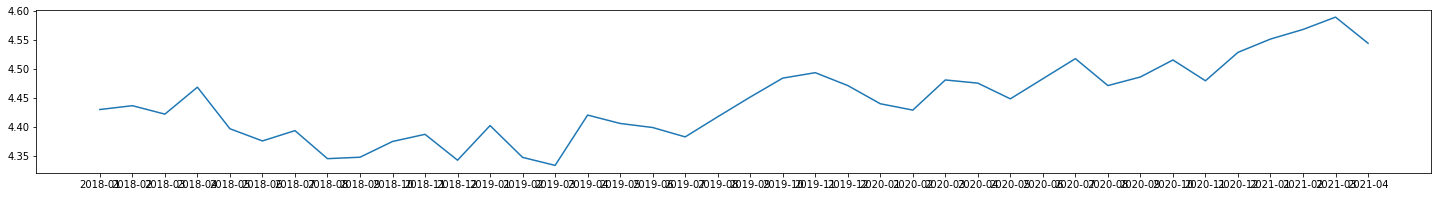

In [3]:
# need to add 'date' column derived from timestamp, then group by it
# note - rather than 'day' we can use 'isocalendar.week'. However, this will give us just a week number
# with no year attached. Need to use 'strftime' instead ('%U' = week number)
# data['Week'] = data['Timestamp'].dt.isocalendar().week

data['Month'] = data['Timestamp'].dt.strftime('%Y-%m')
month_average = data.groupby(['Month']).mean()
print(month_average)

# make figure more presentable
plt.figure(figsize=(25,3))
plt.plot(month_average.index,month_average['Rating'])


## Average rating per course per month

<AxesSubplot:xlabel='Month'>

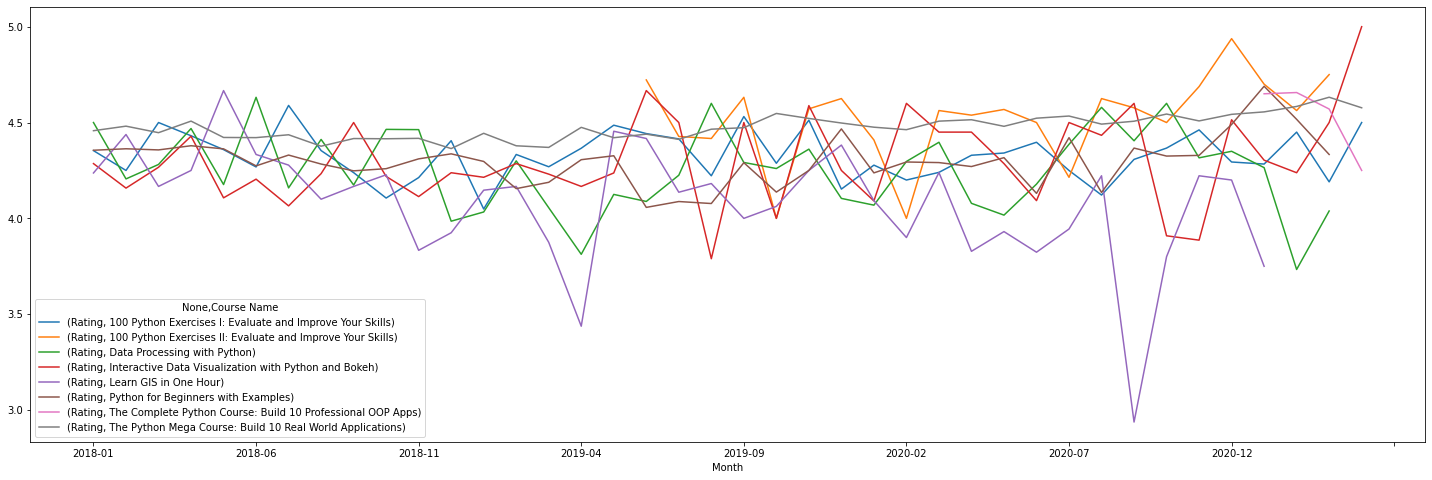

In [3]:
# Group by month into new df
# Use 'unstack' method to turn data into 2d table
data['Month'] = data['Timestamp'].dt.strftime('%Y-%m')
month_average_course = data.groupby(['Month','Course Name']).mean().unstack()
month_average_course.head(20)

# stack vs unstack
# https://www.datasciencemadesimple.com/reshape-using-stack-unstack-function-pandas-python/
# Reshaping the data using stack() function in pandas converts the data into stacked format, i.e. the column 
# is stacked row wise. When more than one column header is present we can stack the specific column header 
# by specified the level. unstack() function in pandas converts the data into unstacked format

# to plot graph, x-axis is clear but y is not. We can instead use 'plot' directly on dataframe...
month_average_course.plot(figsize=(25,8))